In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

2023-09-01 09:31:16.684012: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-01 09:31:17.498855: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-01 09:31:17.523158: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
from importlib import reload

In [5]:
reload(postprocess)
from postprocess import *
reload(plot)
from plot import *
reload(QuasinormalMode) 
from QuasinormalMode import *
reload(spheroidal)
from spheroidal import *

In [6]:
import pandas as pd
from matplotlib import ticker 
from matplotlib.cm import get_cmap

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [8]:
settingname = "normal2_prodB1"
df = pd.read_csv(f"../../pickle/data_frame/{settingname}.csv")

In [9]:
df = classify_modes(df)

In [10]:
ROOT_PATH = jaxqualin_path
PLOT_PATH = os.path.join(ROOT_PATH, f"plots/{settingname}/")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")

In [11]:
spheroidal_check_list = [(2, 2, 3, 0), (3, 2, 2, 0)]

233 0.389877236144012
236 0.4268508766060001
237 0.4645534520110005
241 0.526308386718
260 0.1244714960710012
261 0.2397770557600026
262 0.270613474329
264 0.2495322685770005
265 0.2566123051830005
266 0.2843549342800001
267 0.299237657077
1445 0.1576790375861976
1446 0.1797445262140178
1455 0.0212991195598697
1461 0.3247435333170594
1462 0.2619787032171229
1484 0.3129016027050195
1494 0.4156907034660702
1449 0.0104997153282985


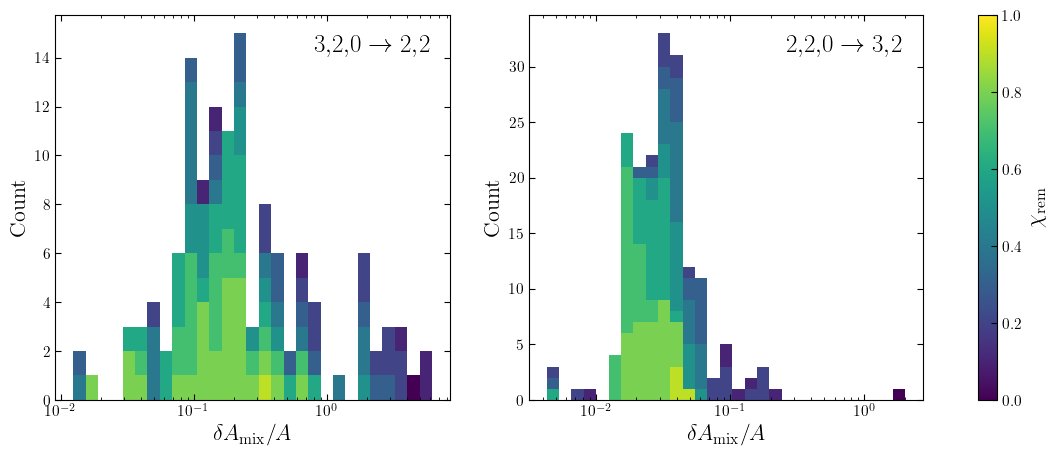

In [12]:
fig, axs = plt.subplots(1,2, figsize = (14,5))

savestrings = []

for (l, m, l_p, n_p), ax in zip(spheroidal_check_list, axs):
    mix_check_num = mixing_check_SXS_nums(df, l, m, l_p, n_p)

    ratio_err_list = []
    chi_list = []

    for SXS_num in mix_check_num:
        df_num = df[df['SXS_num'] == SXS_num]
        chi_rem = df_num['chi_rem'].values[0]
        chi_list.append(chi_rem)
        A_ratio, phi_diff = give_mixing_ratio(df_num, l, m, l_p, n_p)
        mu = ssmc_ratio(l, m, l_p, n_p, chi_rem)
        muabs = np.abs(mu)
        ratio_err = np.abs((A_ratio - muabs)/muabs)
        if ratio_err > 1:
            print(SXS_num, chi_rem)
        ratio_err_list.append(ratio_err)

    ratio_err_list = np.array(ratio_err_list)
    chi_list = np.array(chi_list)

    chi_rem_color_list = np.linspace(0, 1, num = 11)[:-1]
    cmap = get_cmap('viridis')
    
    logbins = np.logspace(np.log10(min(ratio_err_list)),np.log10(max(ratio_err_list)),30)
    for i, chi in enumerate(chi_rem_color_list):
        ax.hist(ratio_err_list[chi_list > chi], bins = logbins, color = cmap(chi))
    # add colorbar to the plot corresponding to chi_rem
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    ax.set_xscale('log')
    ax.set_xlabel(r"$\delta A_{\rm mix} / A$", fontsize = 16)
    ax.set_ylabel("Count", fontsize = 16)
    # ax.set_title(f"{l_p}.{m}.{n_p} mixing into lm = {l}{m}", fontsize = 20)

    textstr = f"${l_p}{{,}}{m}{{,}}{n_p} " +r"\to" + f" {l}{{,}}{m}$"
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=18,
            verticalalignment='top', horizontalalignment='right')
    
    savestrings.append(f"{l}{m}_{l_p}.{m}.{n_p}")

    # plt.savefig(PLOT_PATH + f"spheroidal/{settingname}_{l}{m}_{l_p}.{m}.{n_p}.pdf", bbox_inches = "tight")
    # plt.savefig(PLOT_PATH + f"spheroidal/{settingname}_{l}{m}_{l_p}.{m}.{n_p}.png", dpi = 150, bbox_inches = "tight",
    #         facecolor='white', transparent=False)

savestring = '_'.join(savestrings)

cbar = fig.colorbar(sm, ax = axs)
cbar.ax.set_ylabel(r"$\chi_{\rm rem}$", fontsize = 16)

plt.savefig(PLOT_PATH_ROOT + f"{settingname}_{savestring}.pdf", bbox_inches = "tight")

# fig.tight_layout()